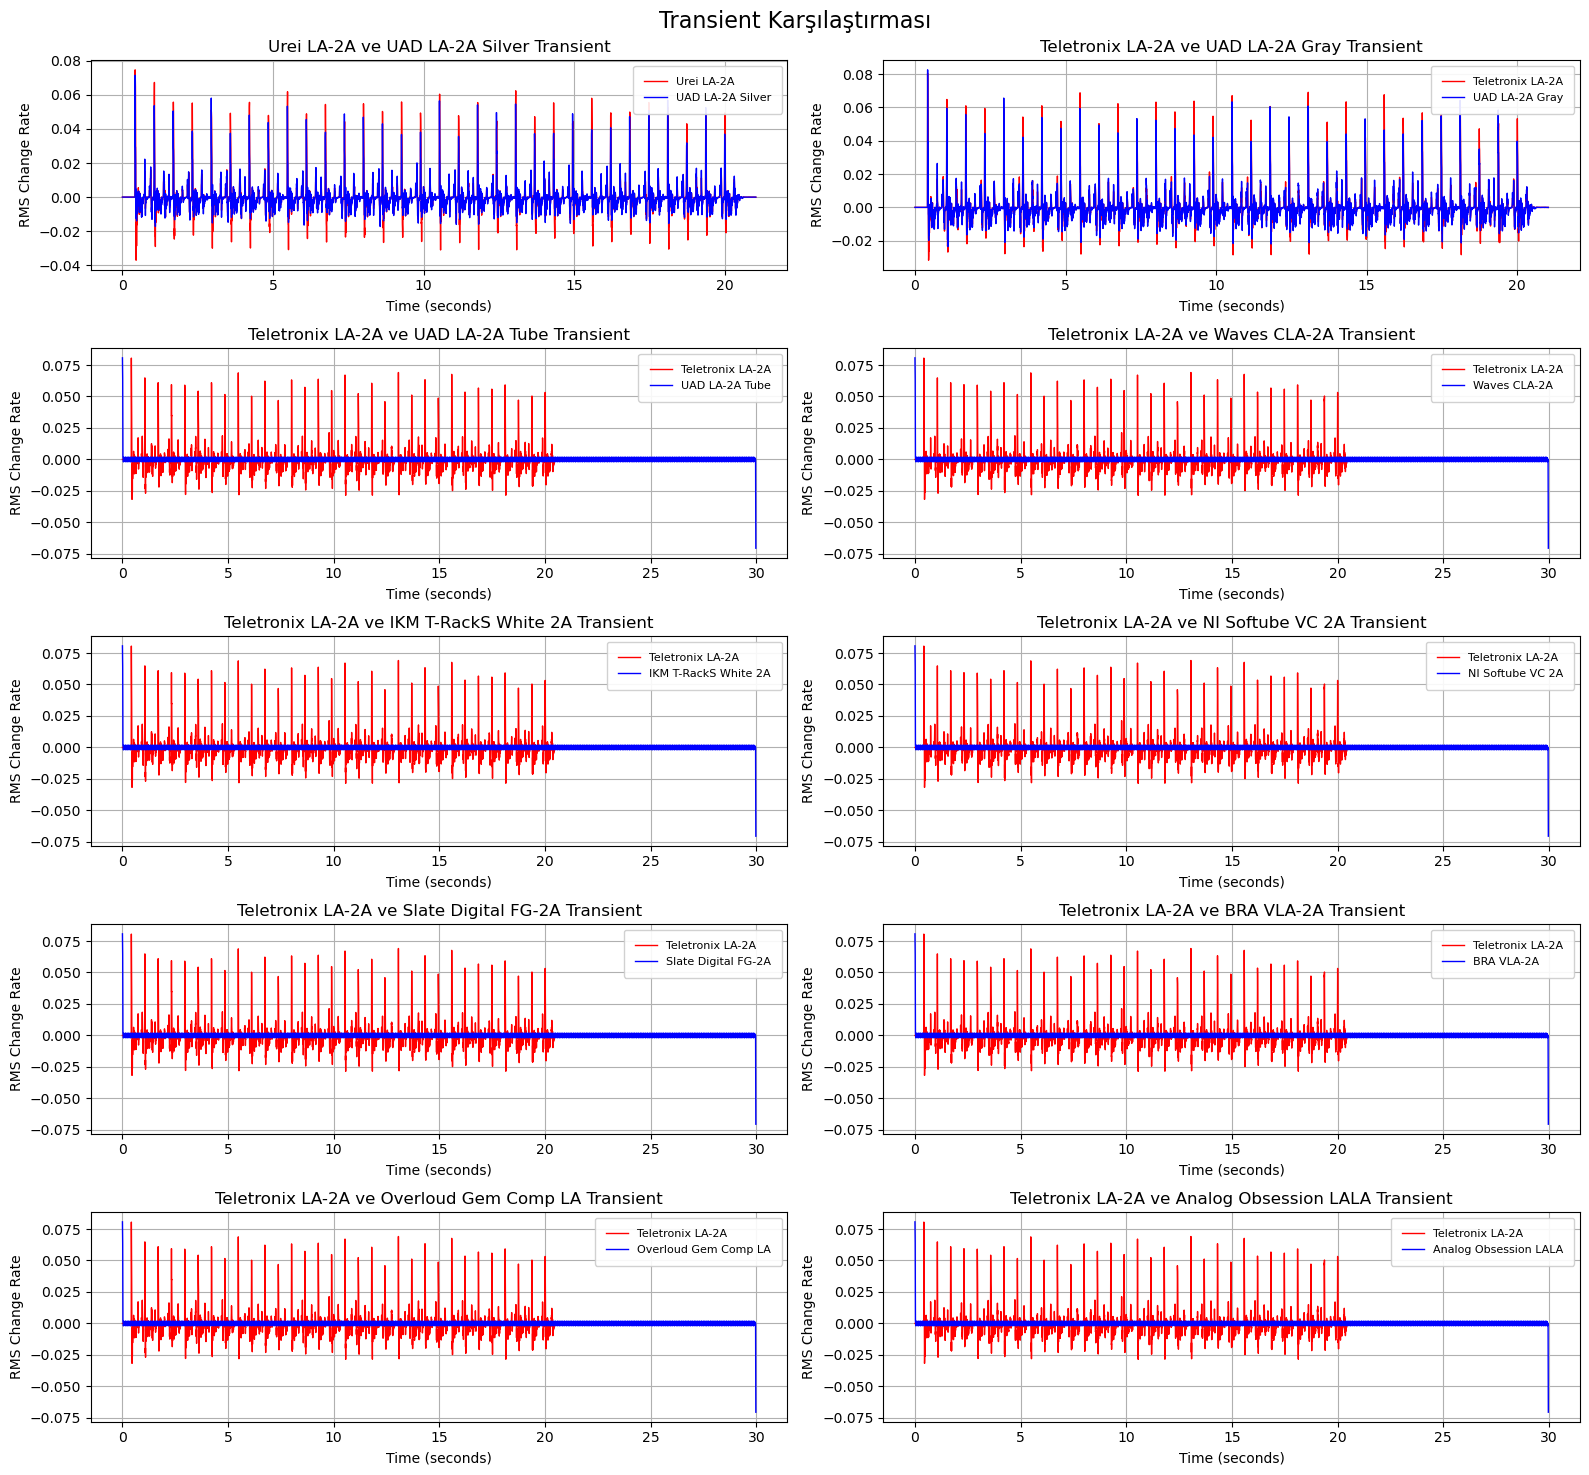

In [7]:
# Ses dalgasındaki ani ses değişimlerini veya geçici enerji artışlarını ifade eder.
# Y ekseni RMS değerinin zamanla ne kadar hızlı değiştiğini ölçer.

# Önerilen dosya: Davul

# Librosa sisteminin aktarılması
import matplotlib.pyplot as plt # Grafik ve görselleştirme işlemleri için Matplotlib kütüphanesini yükler.
import numpy as np # Bilimsel hesaplama ve dizi işlemleri için NumPy kütüphanesini yükler.
import librosa # Ses işleme ve analiz için Librosa kütüphanesini yükler.
import librosa.display # Librosa’nın ses grafikleri çizme fonksiyonlarını yükler.
import pyloudnorm as pyln  # LUFS analizini yapar.
import IPython.display as ipd # Ses dosyalarını Jupyter'da çalmak için gerekli IPython fonksiyonlarını yükler.
from IPython.display import Audio, display  # Ses dosyalarını Jupyter hücresinde oynatmaya olanak tanır.
from scipy import signal # Python'daki SciPy kütüphanesinin signal modülünü içe aktarmaya yarar.

# Ses dosyalarının yollarını bir listeye ekleme
audio_files = [
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/yollar.drums LA2A Teletronix_16.wav", 
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/yollar.drums.LA2A Urei_15.wav",     
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/yollar.drums.uad gray render_01.wav",
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/yollar.drums.uad silver render_04.wav",
    "/Users/nazimerensahin/Desktop/d100hz.wav",
    "/Users/nazimerensahin/Desktop/d100hz.wav",
    "/Users/nazimerensahin/Desktop/d100hz.wav",
    "/Users/nazimerensahin/Desktop/d100hz.wav",
    "/Users/nazimerensahin/Desktop/d100hz.wav",
    "/Users/nazimerensahin/Desktop/d100hz.wav",
    "/Users/nazimerensahin/Desktop/d100hz.wav",
    "/Users/nazimerensahin/Desktop/d100hz.wav",
]

# Her dosya için açıklayıcı isimler ekleme
audio_labels = [
    "Teletronix LA-2A",
    "Urei LA-2A",
    "UAD LA-2A Gray",
    "UAD LA-2A Silver",
    "UAD LA-2A Tube",
    "Waves CLA-2A",
    "IKM T-RackS White 2A",
    "NI Softube VC 2A",
    "Slate Digital FG-2A",
    "BRA VLA-2A",
    "Overloud Gem Comp LA",
    "Analog Obsession LALA",
]

# Teletronix ve Urei dosyalarını referans olarak yükleme
teletronix_sound, teletronix_sr = librosa.load(audio_files[0], sr=None)
urei_sound, urei_sr = librosa.load(audio_files[1], sr=None)
uad_silver_sound, uad_silver_sr = librosa.load(audio_files[3], sr=None)

# RMS farklarını hesaplama fonksiyonu
def compute_transient(signal, sr, hop_length):
    rms = librosa.feature.rms(y=signal, hop_length=hop_length)[0]
    delta_rms = np.diff(rms)
    times = librosa.times_like(delta_rms, sr=sr, hop_length=hop_length)
    return delta_rms, times

# Parametreler
hop_length = 512

# Teletronix ve Urei için transient hesaplama
teletronix_transient, teletronix_times = compute_transient(teletronix_sound, teletronix_sr, hop_length)
urei_transient, urei_times = compute_transient(urei_sound, urei_sr, hop_length)
uad_silver_transient, uad_silver_times = compute_transient(uad_silver_sound, uad_silver_sr, hop_length)

# Karşılaştırılacak dosyalar
comparison_pairs = [
    # Urei ile sadece UAD Silver karşılaştırması
    (audio_files[3], "UAD LA-2A Silver", urei_transient, urei_times, "Urei LA-2A"),
    # Teletronix ile diğer dosyalar karşılaştırması
    (audio_files[2], "UAD LA-2A Gray", teletronix_transient, teletronix_times, "Teletronix LA-2A"),
    (audio_files[4], "UAD LA-2A Tube", teletronix_transient, teletronix_times, "Teletronix LA-2A"),
    (audio_files[5], "Waves CLA-2A", teletronix_transient, teletronix_times, "Teletronix LA-2A"),
    (audio_files[6], "IKM T-RackS White 2A", teletronix_transient, teletronix_times, "Teletronix LA-2A"),
    (audio_files[7], "NI Softube VC 2A", teletronix_transient, teletronix_times, "Teletronix LA-2A"),
    (audio_files[8], "Slate Digital FG-2A", teletronix_transient, teletronix_times, "Teletronix LA-2A"),
    (audio_files[9], "BRA VLA-2A", teletronix_transient, teletronix_times, "Teletronix LA-2A"),
    (audio_files[10], "Overloud Gem Comp LA", teletronix_transient, teletronix_times, "Teletronix LA-2A"),
    (audio_files[11], "Analog Obsession LALA", teletronix_transient, teletronix_times, "Teletronix LA-2A"),
]

# Grafik düzeni
n_graphs = len(comparison_pairs)
n_cols = 2
n_rows = (n_graphs + 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3))
axes = axes.flatten()

# Grafik oluşturma
for idx, (file, label, ref_transient, ref_times, ref_label) in enumerate(comparison_pairs):
    # Ses dosyasını yükle
    sound, sr = librosa.load(file, sr=None)
    transient, times = compute_transient(sound, sr, hop_length)
    
    # Grafik çizimi
    ax = axes[idx]
    ax.plot(ref_times, ref_transient, label=f"{ref_label}", color='red', linewidth=1)
    ax.plot(times, transient, label=f"{label}", color='blue', linewidth=1)
    
    # Başlık, eksen bilgileri ve gösterge
    ax.set_title(f"{ref_label} ve {label} Transient")
    ax.set_xlabel("Time (seconds)")
    ax.set_ylabel("RMS Change Rate")
    ax.legend(fontsize=8, loc="upper right", frameon=True, framealpha=0.9, borderpad=1)
    ax.grid(True)

# Boş alt eksenleri gizleme
for idx in range(n_graphs, len(axes)):
    fig.delaxes(axes[idx])

# Genel düzenleme ve gösterim
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle("Transient Karşılaştırması", fontsize=16)
plt.show()
